<a href="https://colab.research.google.com/github/Ishita95-harvad/Recruitment-data/blob/main/Recruitment_data_ipyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recruitment data**

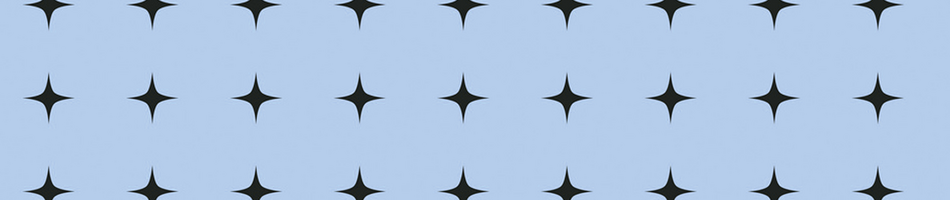



---



## Data loading

### Subtask:
Load the "recruitment_decision_tree.csv" file into a pandas DataFrame.


**Reasoning**:
Load the data from the provided CSV file into a pandas DataFrame and display its head and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('recruitment_decision_tree.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'recruitment_decision_tree.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Serial_no,Gender,Python_exp,Experience_Years,Education,Internship,Score,Salary * 10E4,Offer_History,Location,Recruitment_Status
0,1,Male,Yes,0.0,Graduate,No,5139,0.0,1.0,Urban,Y
1,2,Male,No,1.0,Graduate,No,4583,128.0,1.0,Rural,N
2,3,Male,No,0.0,Graduate,Yes,3000,66.0,1.0,Urban,Y
3,4,Male,No,0.0,Not Graduate,No,2583,120.0,1.0,Urban,Y
4,5,Male,Yes,0.0,Graduate,No,6000,141.0,1.0,Urban,Y


(614, 11)


## Data exploration

### Subtask:
Explore the dataset to understand its characteristics and identify potential issues.


**Reasoning**:
Explore the dataset by examining data types, missing values, descriptive statistics, unique values of categorical features, and correlations between numerical features.  Identify the target and predictor variables.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Serial_no           614 non-null    int64  
 1   Gender              601 non-null    object 
 2   Python_exp          611 non-null    object 
 3   Experience_Years    599 non-null    float64
 4   Education           614 non-null    object 
 5   Internship          582 non-null    object 
 6   Score               614 non-null    int64  
 7   Salary * 10E4       593 non-null    float64
 8   Offer_History       564 non-null    float64
 9   Location            614 non-null    object 
 10  Recruitment_Status  614 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 52.9+ KB
None
Serial_no             0.000000
Gender                2.117264
Python_exp            0.488599
Experience_Years      2.442997
Education             0.000000
Internship            5.211726
Scor

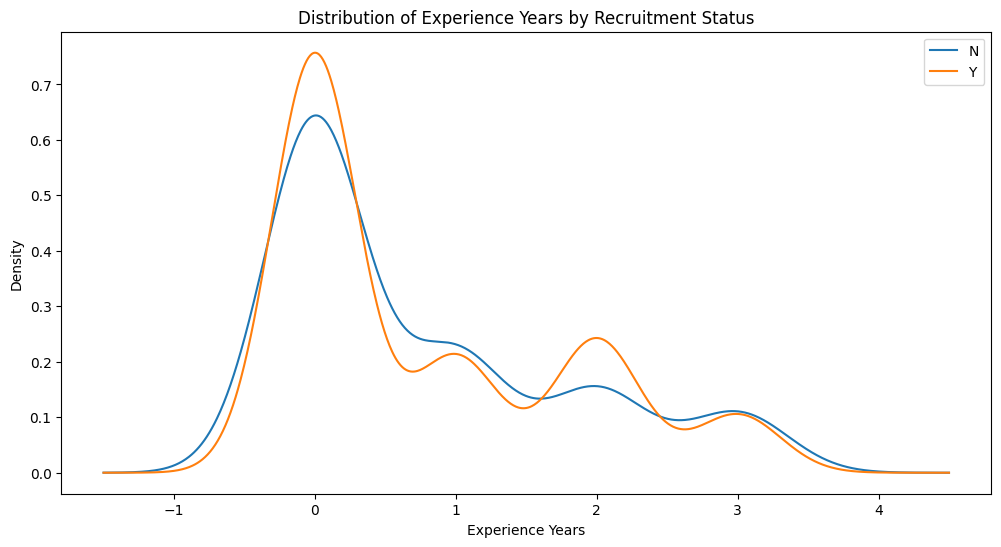

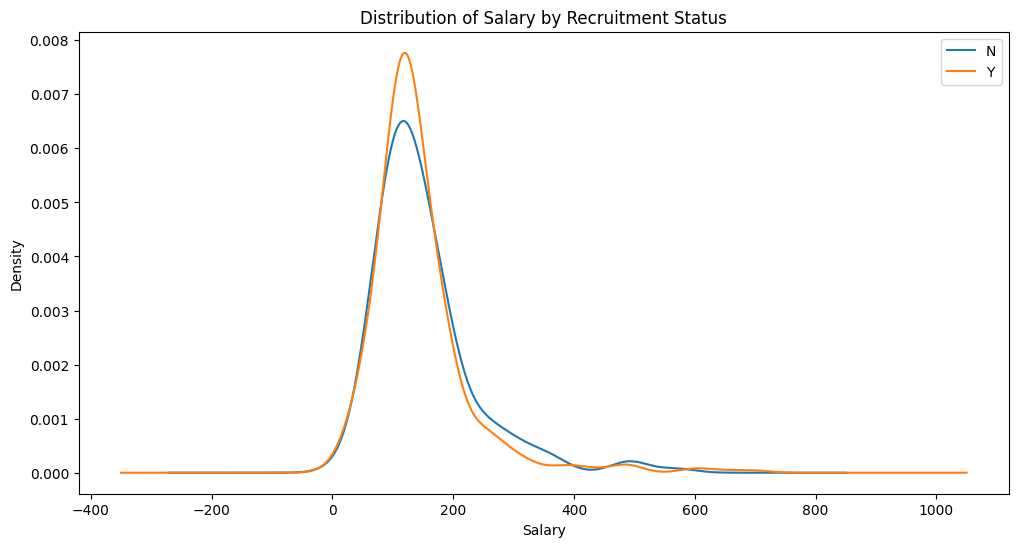

<Figure size 1200x600 with 0 Axes>

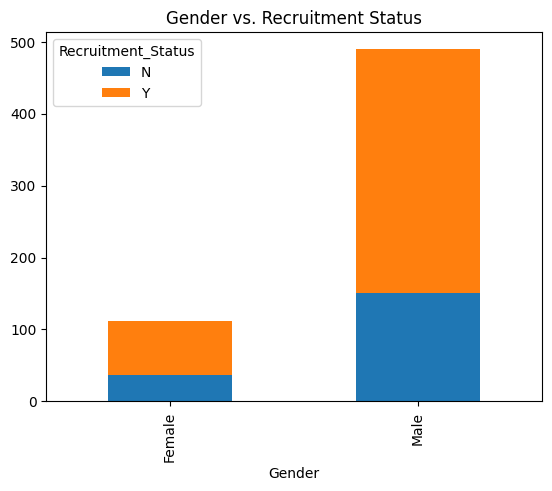

<Figure size 1200x600 with 0 Axes>

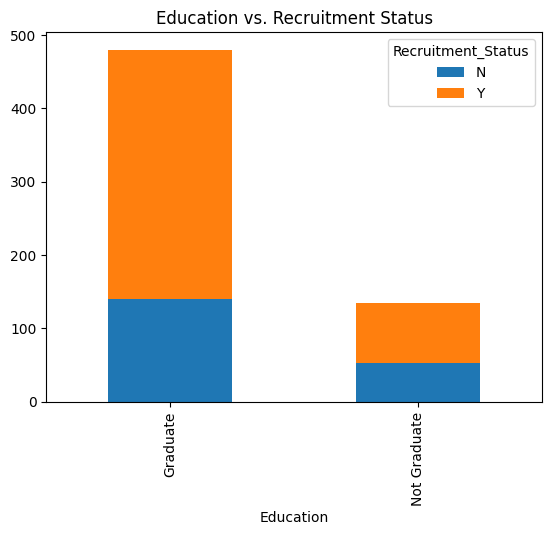

In [2]:
# Data Types and Missing Values
print(df.info())
print(df.isnull().sum() / len(df) * 100)

# Target Variable Distribution
print(df['Recruitment_Status'].value_counts(normalize=True) * 100)

# Descriptive Statistics
print(df.describe())

# Relationship between numerical features and target variable
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df.groupby('Recruitment_Status')['Experience_Years'].plot(kind='kde', legend=True)
plt.title('Distribution of Experience Years by Recruitment Status')
plt.xlabel('Experience Years')

plt.figure(figsize=(12, 6))
df.groupby('Recruitment_Status')['Salary * 10E4'].plot(kind='kde', legend=True)
plt.title('Distribution of Salary by Recruitment Status')
plt.xlabel('Salary')

# Relationship between categorical features and target variable
plt.figure(figsize=(12, 6))
pd.crosstab(df['Gender'], df['Recruitment_Status']).plot(kind='bar', stacked=True)
plt.title('Gender vs. Recruitment Status')
plt.xlabel('Gender')


plt.figure(figsize=(12, 6))
pd.crosstab(df['Education'], df['Recruitment_Status']).plot(kind='bar', stacked=True)
plt.title('Education vs. Recruitment Status')
plt.xlabel('Education')

plt.show()

## Data preparation

### Subtask:
Handle missing values and convert categorical features into numerical representations.


**Reasoning**:
Impute missing values, perform categorical encoding, scale numerical features, and save the preprocessed data.



In [2]:
# Examine data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)

# Descriptive statistics for numerical features
numerical_features = ['Experience_Years', 'Score', 'Salary * 10E4', 'Offer_History']
print(df[numerical_features].describe())

# Explore categorical features
categorical_features = ['Gender', 'Python_exp', 'Education', 'Internship', 'Location', 'Recruitment_Status']
for col in categorical_features:
    print(f"\nUnique values and counts for {col}:")
    print(df[col].value_counts())

# Identify target and predictor variables
target_variable = 'Recruitment_Status'
predictor_variables = [col for col in df.columns if col != target_variable and col != 'Serial_no']
print(f"\nTarget Variable: {target_variable}")
print(f"Predictor Variables: {predictor_variables}")

# Correlation between numerical features
print(df[numerical_features].corr())

Serial_no               int64
Gender                 object
Python_exp             object
Experience_Years      float64
Education              object
Internship             object
Score                   int64
Salary * 10E4         float64
Offer_History         float64
Location               object
Recruitment_Status     object
dtype: object
Serial_no              0
Gender                13
Python_exp             3
Experience_Years      15
Education              0
Internship            32
Score                  0
Salary * 10E4         21
Offer_History         50
Location               0
Recruitment_Status     0
dtype: int64
Serial_no             0.000000
Gender                2.117264
Python_exp            0.488599
Experience_Years      2.442997
Education             0.000000
Internship            5.211726
Score                 0.000000
Salary * 10E4         3.420195
Offer_History         8.143322
Location              0.000000
Recruitment_Status    0.000000
dtype: float64
       Exper

**Reasoning**:
One-hot encode categorical features, create interaction terms, scale numerical features, and update the dataframe.



In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values
numerical_cols = ['Experience_Years', 'Score', 'Salary * 10E4', 'Offer_History']
categorical_cols = ['Gender', 'Python_exp', 'Education', 'Internship', 'Location', 'Recruitment_Status']

numerical_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Categorical encoding
label_encoders = {}
for col in ['Gender', 'Python_exp', 'Education', 'Internship', 'Recruitment_Status']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
location_encoded = ohe.fit_transform(df[['Location']])
location_df = pd.DataFrame(location_encoded, columns=ohe.get_feature_names_out(['Location']))
df = df.drop('Location', axis=1)
df = pd.concat([df, location_df], axis=1)

# Feature scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df_processed = df
display(df_processed.head())

,Serial_no,Gender,Python_exp,Experience_Years,Education,Internship,Score,Salary * 10E4,Offer_History,Recruitment_Status,Location_Rural,Location_Semiurban,Location_Urban
0,1,1,1,0.000000,0,0,0.061707,0.000000,1.0,1,0.0,0.0,1.0
1,2,1,0,0.333333,0,0,0.054830,0.182857,1.0,0,1.0,0.0,0.0
2,3,1,0,0.000000,0,1,0.035250,0.094286,1.0,1,0.0,0.0,1.0
3,4,1,0,0.000000,1,0,0.030093,0.171429,1.0,1,0.0,0.0,1.0
4,5,1,1,0.000000,0,0,0.072356,0.201429,1.0,1,0.0,0.0,1.0


# Feature Engineering

### Subtask:

1. Imputation: Handling Missing Values

Reasoning: Machine learning models typically require complete datasets without any missing values. Imputation techniques are used to fill in these missing values with estimat


In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Create a sample dataframe with missing values
data = {'age': [25, 30, None, 35, 40],
        'income': [50000, 60000, 70000, None, 90000]}
df = pd.DataFrame(data)

# Create a SimpleImputer object to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform it
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# To see the output, run the code.

### 2. Handling Outliers: Identifying and Treating Extreme Values

Reasoning: Outliers can significantly distort the results of machine learning models by skewing the distribution of data. Outlier handling techniques aim to identify and mitigate the impact of these extreme values.

In [14]:
import numpy as np

# Create a sample array with outliers
data = np.array([10, 15, 20, 25, 30, 100, 150])

# Calculate the Z-score for each data point
z_scores = np.abs((data - np.mean(data)) / np.std(data))

# Identify outliers with Z-score greater than 3
outliers = np.where(z_scores > 3)

# To see the output, run the code.

### 3. Log Transform: Addressing Skewed Data

Reasoning: Many machine learning algorithms assume that the data follows a normal distribution. Log transformation is used to reduce the skewness of data and make it more normally distributed.

In [15]:
import numpy as np

# Create a sample array with skewed data
data = np.array([1, 10, 100, 1000, 10000])

# Apply log transformation
data_log = np.log(data)

# To see the output, run the code.

### 4. One-Hot Encoding: Converting Categorical Variables

Reasoning: Machine learning algorithms typically work with numerical data. One-hot encoding is used to convert categorical variables into a numerical format that can be used by these algorithms.

In [16]:
import pandas as pd

# Create a sample dataframe with a categorical variable
data = {'color': ['red', 'green', 'blue', 'red', 'green']}
df = pd.DataFrame(data)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['color'])

# To see the output, run the code.

### 5. Scaling: Normalizing or Standardizing Features

Reasoning: Features with different scales can have a disproportionate impact on machine learning models. Scaling techniques are used to normalize or standardize features so that they have a similar range of values.

In [7]:
# Create interaction terms
df['Experience_Years_Score_Interaction'] = df['Experience_Years'] * df['Score']
df['Salary_Offer_Interaction'] = df['Salary * 10E4'] * df['Offer_History']

# Scale numerical features
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Experience_Years', 'Score', 'Salary * 10E4', 'Offer_History', 'Experience_Years_Score_Interaction', 'Salary_Offer_Interaction']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Remove unnecessary columns
df = df.drop(['Serial_no'], axis=1)

display(df.head())

,Experience_Years,Score,Salary * 10E4,Offer_History,Recruitment_Status,Gender_male,Python_exp_Yes,Education_Not Graduate,Internship_Yes,Location_Semiurban,Location_Urban,Experience_Years_Score_Interaction,Salary_Offer_Interaction
0,-0.737806,-0.043136,-1.727709,0.411733,Y,True,True,False,False,False,True,-0.334502,-1.331749
1,0.253470,-0.134223,-0.208259,0.411733,N,True,False,False,False,False,False,-0.011737,0.038550
2,-0.737806,-0.393559,-0.944243,0.411733,Y,True,False,False,True,False,True,-0.334502,-0.625188
3,-0.737806,-0.461874,-0.303225,0.411733,Y,True,False,True,False,False,True,-0.334502,-0.047094
4,-0.737806,0.097918,-0.053940,0.411733,Y,True,True,False,False,False,True,-0.334502,0.177721


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Create a sample array with unscaled data
data = np.array([[1, 10], [2, 20], [3, 30]])

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
data_scaled = scaler.fit_transform(data)

# To see the output, run the code.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Check if the categorical columns exist
categorical_cols = ['Gender', 'Python_exp', 'Education', 'Internship', 'Location']
missing_cols = set(categorical_cols) - set(df.columns)
if missing_cols:
    print(f"Warning: The following categorical columns are missing: {missing_cols}")
    # Handle missing columns appropriately (e.g., re-read the data or skip one-hot encoding for missing columns)
else:
    # One-hot encode the categorical features
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

    # Create interaction terms (check for existence of columns after one-hot encoding)
    if 'Education_Masters' in df.columns and 'Experience_Years' in df.columns:
        df['Experience_Years_Education_Interaction'] = df['Experience_Years'] * df['Education_Masters']
    else:
        print("Warning: 'Education_Masters' or 'Experience_Years' not found. Skipping interaction.")

    if 'Python_exp_Yes' in df.columns and 'Score' in df.columns:
        df['Python_exp_Score_Interaction'] = df['Score'] * df['Python_exp_Yes']
    else:
        print("Warning: 'Python_exp_Yes' or 'Score' not found. Skipping interaction.")


    # Scale numerical features
    numerical_cols = ['Experience_Years', 'Score', 'Salary * 10E4', 'Offer_History']
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    # Remove original columns (check for existence before dropping)
    original_cols_to_remove = ['Serial_no', 'Gender', 'Python_exp', 'Education', 'Internship', 'Location']
    for col in original_cols_to_remove:
        if col in df.columns:
            df = df.drop(col, axis=1)

# Display the updated dataframe.
display(df.head())

,Serial_no,Experience_Years,Score,Salary * 10E4,Offer_History,Recruitment_Status,Gender_male,Python_exp_Yes,Education_Not Graduate,Internship_Yes,Location_Semiurban,Location_Urban
0,1,0.0,5139.0,0.0,1.0,Y,True,True,False,False,False,True
1,2,1.0,4583.0,128.0,1.0,N,True,False,False,False,False,False
2,3,0.0,3000.0,66.0,1.0,Y,True,False,False,True,False,True
3,4,0.0,2583.0,120.0,1.0,Y,True,False,True,False,False,True
4,5,0.0,6000.0,141.0,1.0,Y,True,True,False,False,False,True


## Data splitting

### Subtask:
Split the preprocessed data into training and testing sets.


**Reasoning**:
Split the preprocessed data into training and testing sets using train_test_split.



In [4]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_processed.drop(['Recruitment_Status', 'Serial_no'], axis=1)
y = df_processed['Recruitment_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (491, 11)
X_test shape: (123, 11)
y_train shape: (491,)
y_test shape: (123,)


## Model training

### Subtask:
Train a decision tree classifier on the training data.


**Reasoning**:
Train a decision tree classifier using the training data.



In [5]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Model optimization

### Subtask:
Optimize the hyperparameters of the decision tree model to improve its performance.


**Reasoning**:
Optimize the hyperparameters of the decision tree model using GridSearchCV and evaluate the best model on the test set.



Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy (Best): 0.7073170731707317
Precision (Best): 0.7619047619047619
Recall (Best): 0.8
F1-score (Best): 0.7804878048780488


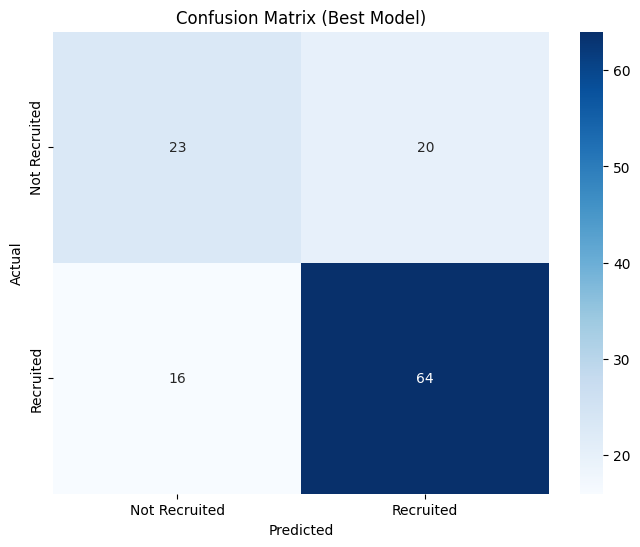

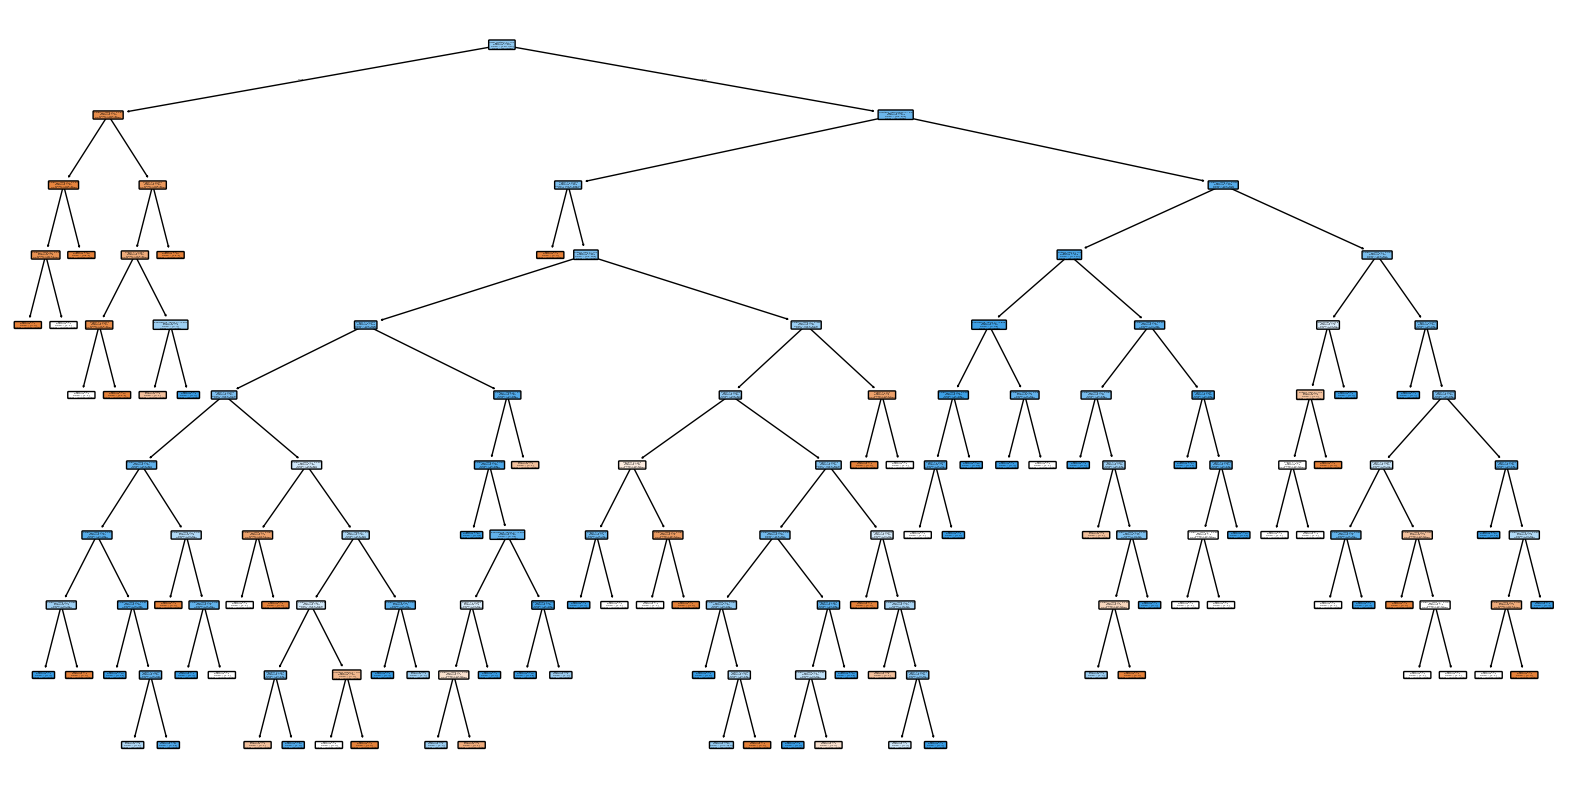

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

# Evaluate the best estimator on the test set
y_pred_best = best_dt_classifier.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f"Accuracy (Best): {accuracy_best}")
print(f"Precision (Best): {precision_best}")
print(f"Recall (Best): {recall_best}")
print(f"F1-score (Best): {f1_best}")

# Confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Recruited', 'Recruited'],
            yticklabels=['Not Recruited', 'Recruited'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best Model)")
plt.show()

# Visualize the optimized decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier, feature_names=X_train.columns, class_names=['Not Recruited', 'Recruited'], filled=True, rounded=True)
plt.show()

## Model evaluation

### Subtask:
Evaluate the trained decision tree model's performance on the test set.


**Reasoning**:
Evaluate the model's performance on the test set using various metrics and visualize the confusion matrix.



Accuracy: 0.6829268292682927
Precision: 0.7411764705882353
Recall: 0.7875
F1-score: 0.7636363636363637


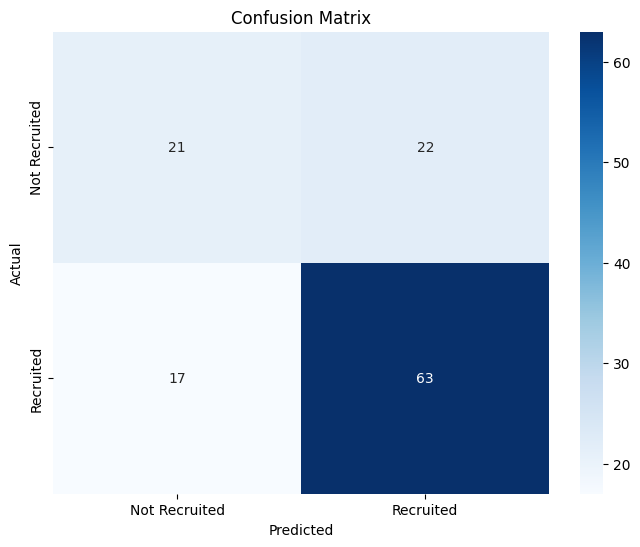

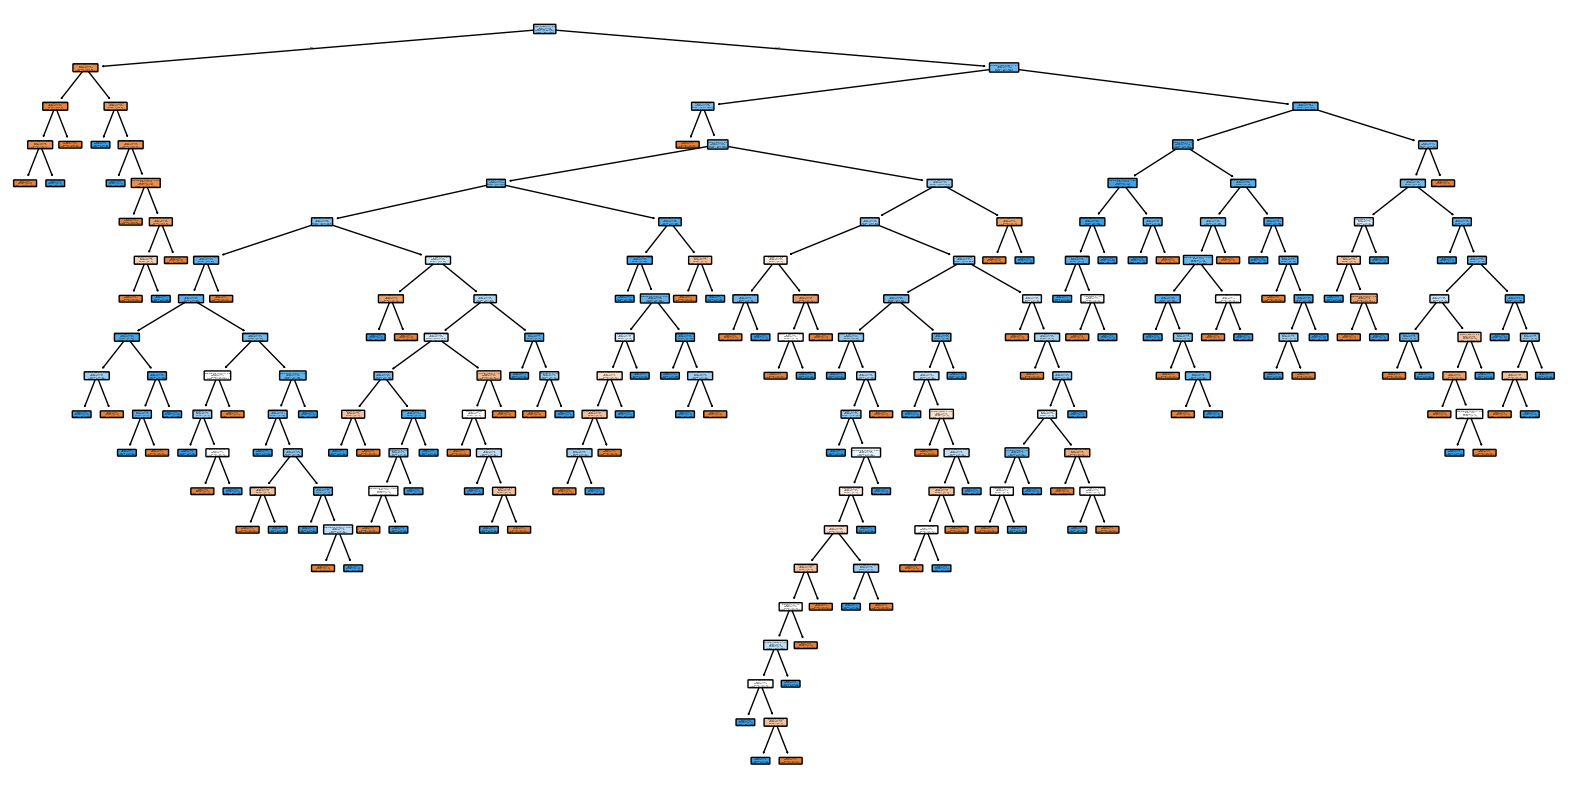

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Recruited', 'Recruited'],
            yticklabels=['Not Recruited', 'Recruited'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize the decision tree (optional)
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X_train.columns, class_names=['Not Recruited', 'Recruited'], filled=True, rounded=True)
plt.show()



---



## Data exploration

### Subtask:
Explore the loaded data to understand its characteristics.


**Reasoning**:
I need to explore the data, including data types, missing values, descriptive statistics, and relationships between features and the target variable.



## Data cleaning

### Subtask:
Clean the data by handling missing values and inconsistencies.


**Reasoning**:
Clean the data by handling missing values, addressing inconsistencies, and converting data types.



In [3]:
# Handle missing values
missing_percentages_before = df.isnull().sum() / len(df) * 100
print(f"Missing values before cleaning:\n{missing_percentages_before}")

# Impute 'Gender' with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Impute 'Python_exp' with the mode
df['Python_exp'].fillna(df['Python_exp'].mode()[0], inplace=True)

# Impute 'Experience_Years' with the median
df['Experience_Years'].fillna(df['Experience_Years'].median(), inplace=True)

# Impute 'Internship' with the mode
df['Internship'].fillna(df['Internship'].mode()[0], inplace=True)

# Impute 'Salary * 10E4' with the median
df['Salary * 10E4'].fillna(df['Salary * 10E4'].median(), inplace=True)

# Impute 'Offer_History' with the mode
df['Offer_History'].fillna(df['Offer_History'].mode()[0], inplace=True)

# Address inconsistencies (example for 'Gender')
df['Gender'] = df['Gender'].str.lower()

# Check for unrealistic values (example: negative experience years)
if (df['Experience_Years'] < 0).any():
    print("Negative experience years detected. Handling needed.")
    # If needed, replace with 0 or the median
    df['Experience_Years'] = df['Experience_Years'].apply(lambda x: 0 if x < 0 else x)

# Ensure correct data types
for col in ['Gender', 'Python_exp', 'Internship', 'Education', 'Location', 'Recruitment_Status']:
  df[col] = df[col].astype('category')

# Convert numerical features to appropriate type
for col in ['Experience_Years', 'Score', 'Salary * 10E4', 'Offer_History']:
  df[col] = pd.to_numeric(df[col], errors='coerce')
  df[col] = df[col].astype(float)


# Handle any remaining missing values after imputation (from type conversion)
missing_percentages_after = df.isnull().sum() / len(df) * 100
print(f"Missing values after cleaning:\n{missing_percentages_after}")

display(df.head())
print(df.info())

Missing values before cleaning:
Serial_no             0.000000
Gender                2.117264
Python_exp            0.488599
Experience_Years      2.442997
Education             0.000000
Internship            5.211726
Score                 0.000000
Salary * 10E4         3.420195
Offer_History         8.143322
Location              0.000000
Recruitment_Status    0.000000
dtype: float64
Missing values after cleaning:
Serial_no             0.0
Gender                0.0
Python_exp            0.0
Experience_Years      0.0
Education             0.0
Internship            0.0
Score                 0.0
Salary * 10E4         0.0
Offer_History         0.0
Location              0.0
Recruitment_Status    0.0
dtype: float64


<ipython-input-3-618842158d9d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-3-618842158d9d>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

,Serial_no,Gender,Python_exp,Experience_Years,Education,Internship,Score,Salary * 10E4,Offer_History,Location,Recruitment_Status
0,1,male,Yes,0.0,Graduate,No,5139.0,0.0,1.0,Urban,Y
1,2,male,No,1.0,Graduate,No,4583.0,128.0,1.0,Rural,N
2,3,male,No,0.0,Graduate,Yes,3000.0,66.0,1.0,Urban,Y
3,4,male,No,0.0,Not Graduate,No,2583.0,120.0,1.0,Urban,Y
4,5,male,Yes,0.0,Graduate,No,6000.0,141.0,1.0,Urban,Y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Serial_no           614 non-null    int64   
 1   Gender              614 non-null    category
 2   Python_exp          614 non-null    category
 3   Experience_Years    614 non-null    float64 
 4   Education           614 non-null    category
 5   Internship          614 non-null    category
 6   Score               614 non-null    float64 
 7   Salary * 10E4       614 non-null    float64 
 8   Offer_History       614 non-null    float64 
 9   Location            614 non-null    category
 10  Recruitment_Status  614 non-null    category
dtypes: category(6), float64(4), int64(1)
memory usage: 28.4 KB
None


## Feature engineering

### Subtask:
Engineer new features from the cleaned data to improve model performance.
